# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
2 1 2 3 1 1 0 2 2 4 3 3 0 3 0 3 2 3 1 2
2 3 0 2 3 0 2 3 3 4 4 1 4 0 0 1 2 4 4 3
0 0 0 2 2 3 2 1 0 0 0 3 1 0 1 2 1 2 2 4
3 2 0 0 1 0 3 0 0 3 1 3 4 2 3 3 2 0 4 """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([2, 1, 2, 3, 1, 1, 0, 2, 2, 4, 3, 3, 0, 3, 0, 3, 2, 3, 1, 2, 2, 3, 0,
       2, 3, 0, 2, 3, 3, 4, 4, 1, 4, 0, 0, 1, 2, 4, 4, 3, 0, 0, 0, 2, 2, 3,
       2, 1, 0, 0, 0, 3, 1, 0, 1, 2, 1, 2, 2, 4, 3, 2, 0, 0, 1, 0, 3, 0, 0,
       3, 1, 3, 4, 2, 3, 3, 2, 0, 4])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]
[0.253, 0.152, 0.241, 0.241, 0.114]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.253,  0.405,  0.646,  0.887,  1.001])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,20,0,0.253,0.253
1,12,1,0.152,0.405
2,19,2,0.241,0.646
3,19,3,0.241,0.887
4,9,4,0.114,1.001


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 12, 38, 57, 36])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

143
79


1.8101265822784811

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.        ,   1.81012658,   3.27655824,   5.93098518,  10.73583393])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([ 1,  1,  2,  6, 24])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.16363342,  0.16363342,  0.16363342,  0.16363342,  0.16363342])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.16363342,  0.29619721,  0.26807722,  0.16175123,  0.07319755])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(5, array(79)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([ 12.92704037,  23.3995794 ,  21.17810035,  12.77834747,   5.78260661])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([  7.07295963, -11.3995794 ,  -2.17810035,   6.22165253,   3.21739339])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  50.02675793,  129.95041057,    4.74412112,   38.70896025,
         10.35162025])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 3.86993128,  5.55353617,  0.2240107 ,  3.02926183,  1.79013046])

In [16]:
abs_Ni_2_Ni.sum()

14.46687045094485

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

6.2334352254724248

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,12.927040,0.163633,1.000000,0.163633,0,7.072960,50.026758,3.869931,1,0
1,23.399579,0.296197,1.810127,0.163633,12,-11.399579,129.950411,5.553536,1,1
2,21.178100,0.268077,3.276558,0.163633,38,-2.178100,4.744121,0.224011,2,2
3,12.778347,0.161751,5.930985,0.163633,57,6.221653,38.708960,3.029262,6,3
4,5.782607,0.073198,10.735834,0.163633,36,3.217393,10.351620,1.790130,24,4


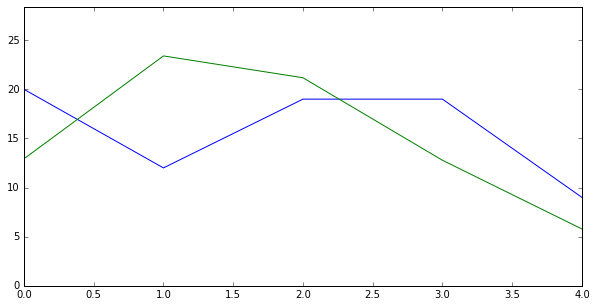

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()